In [1]:
import pandas as pd 

import requests 
from urllib.parse import urlencode 

import matplotlib as mpl
import matplotlib.pyplot as plt


import numpy as np

import datetime
import calendar

import math

import seaborn as sns

In [2]:
#use api to get customers csv
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'

#get url
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href']

#download into customers_df
download_response = requests.get(download_url) 
customers_df = pd.read_csv(download_url)


#same to get orders csv
public_key = 'https://disk.yandex.ru/d/0zWmh1bYP6REbw'

final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href']

download_response = requests.get(download_url) 
orders_df = pd.read_csv(download_url,\
                        parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date'])


#same to get order_items csv
public_key = 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'

final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href']

download_response = requests.get(download_url) 
order_items_df = pd.read_csv(download_url)

<h4>Starting with based data reserch

In [3]:
#merge customers and orders dfs
custNord_df=customers_df.merge(orders_df, left_on='customer_id', right_on='customer_id')

In [4]:
custNord_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [5]:
#number of unique customers, for folowing check
custNord_df.customer_unique_id.value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [6]:
#count orders per unique customer
Order_per_Cust=custNord_df.groupby('customer_unique_id', as_index=False).\
    agg({'order_id':'count'}).\
    sort_values(by='order_id', ascending=False)

In [7]:
#count purchesed orders per unique customer
purchasedOrder_per_Cust=custNord_df[custNord_df['order_approved_at'].notna()]
purchasedOrder_per_Cust=purchasedOrder_per_Cust.groupby('customer_unique_id', as_index=False).\
    agg({'order_id':'count'}).\
    sort_values(by='order_id', ascending=False)

In [8]:
#Number of unique customers with more than 1 order, just checking)
Order_per_Cust.query('order_id>1').count()

customer_unique_id    2997
order_id              2997
dtype: int64

In [9]:
#Number of unique customers with only 1 purchased order
purchasedOrder_per_Cust.query('order_id==1').count()

customer_unique_id    93049
order_id              93049
dtype: int64

In [10]:
#number of unique customers that have any purchase
purchasedOrder_per_Cust.order_id.count()

95997

<h4>There is 93049 unique customers that purchase only 1 order from 96096 unique clients (unique clients that have payed - 95997)<br>

<h4> Lets look at delivery statuses and try to find out how much mean number of orders is not delivered per month<br>

In [11]:
#Make orders df with month and year stamp
orders_by_month=orders_df
orders_by_month['order_purchase_month_year']=orders_by_month['order_purchase_timestamp'].dt.to_period('M')

In [12]:
#df with not delivered orders per month
unD_orders_per_month=orders_by_month.query('order_status!=["delivered"]').\
    groupby('order_purchase_month_year', as_index=False).\
    agg(number_of_orders=('order_id', 'count')).\
    sort_values(by='order_purchase_month_year')

In [13]:
#df with orders that not delivered per month by status 
unD_orders_per_month_bs=orders_by_month.query('order_status!=["delivered"]').\
    groupby(['order_purchase_month_year', 'order_status'], as_index=False).\
    agg(number_of_orders=('order_id', 'count')).\
    sort_values(by=['order_purchase_month_year','order_status'])

In [14]:
#Mean not delivered orders per month
unD_orders_per_month.number_of_orders.mean()

123.45833333333333

In [15]:
#Orders that not delivered per month by status. Table
unD_orders_per_month_bs.head(5)

,order_purchase_month_year,order_status,number_of_orders
0,2016-09,canceled,2
1,2016-09,shipped,1
2,2016-10,canceled,24
3,2016-10,invoiced,18
4,2016-10,processing,2


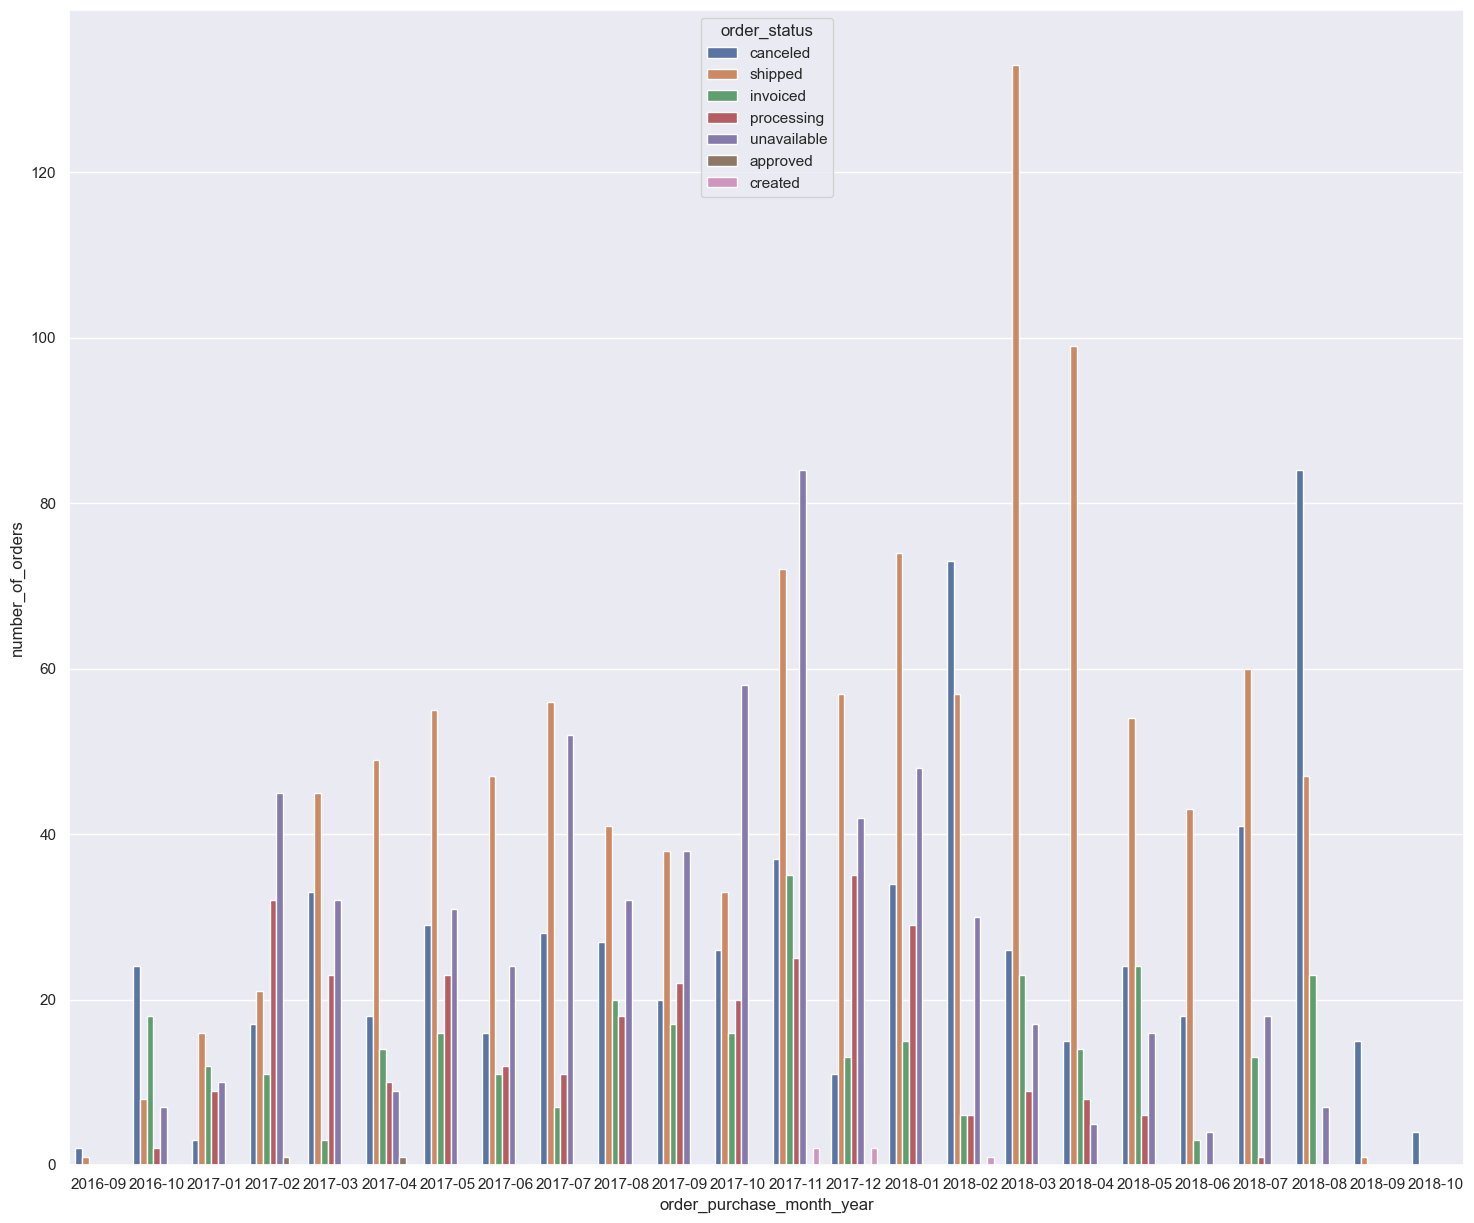

In [17]:
#Orders that not delivered per month by status. Chart
sns.barplot(data=unD_orders_per_month_bs, x='order_purchase_month_year',y='number_of_orders', hue='order_status')
sns.set(rc={'figure.figsize':(20,22)})

<h4>Looking at order statuses we can see that:</h4>
- Mean of orders that is not in 'delivered' status is 123.5 per month.<br>
- Most month has orders that in 'shipping' status, many of it is out of estimated delivery date.<br>
- Also there is significant share of 'canceled' and 'unavalible' orders statuses.<br>
- At some month this statuses even more than the "shipped" one.

<h4>Now lets look at the different products (item ids), and try to find out which week day is the best for each product's sales

In [18]:
#add weekday from purchase timestamp
orders_df['weekday'] = orders_df['order_approved_at'].dt.dayofweek

In [19]:
#merge orders with items
OrdIt_df=orders_df.merge(order_items_df, left_on='order_id', right_on='order_id')

In [20]:
#group by weekday and item id and count
item_per_weekday=OrdIt_df.groupby(['weekday','order_item_id'], as_index=False)\
    .agg(num_of_items=('customer_id', 'count'))    

In [21]:
#pivot weekdays-items
pivot_wd_i=pd.pivot_table(item_per_weekday, index='weekday', columns='order_item_id')

In [22]:
#Max purchased items per week - highlited, weekdays 0 - monday to 6 -sunday
pivot_wd_i.style.highlight_max(color = 'lightgreen').format('{:.0f}')


<h4>Based on product's weekday sellings table, we can tell that:</h4>
- Most number of goods been purchased at tueseday.<br>
- More than that, item that has id number '1' is the most popular selling at every week day, while ids from '13' to '21' had been sold less than 10 times each for all the time.<br>

<h4>Next lets see mean of purchases per customer per week

In [23]:
#drop not paied orders,add month-year column for order_approved_at
custNord_df_nona=custNord_df.dropna(subset=['order_approved_at'])
custNord_df_nona['purchase_month_year']=custNord_df_nona['order_approved_at'].dt.to_period('M')

C:\Users\ilini\AppData\Local\Temp\ipykernel_11628\18736618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custNord_df_nona['purchase_month_year']=custNord_df_nona['order_approved_at'].dt.to_period('M')


In [25]:
#group customers and month-year of purchse, count purchases
purch_per_cust_per_month=custNord_df_nona.groupby(['customer_unique_id','purchase_month_year'], as_index=False)\
    .agg(number_of_purchases_per_month=('order_approved_at', 'count'))

In [26]:
#add column with number of week per month
purch_per_cust_per_month['weeks_per_month'] = purch_per_cust_per_month['purchase_month_year'].apply(lambda d: (d.day) / 7)

In [27]:
#add column with mean number of purchases per week during month
purch_per_cust_per_month['mean_week_purch']=\
    purch_per_cust_per_month['number_of_purchases_per_month']/purch_per_cust_per_month['weeks_per_month']

purch_per_cust_per_month.sort_values('mean_week_purch')

,customer_unique_id,purchase_month_year,number_of_purchases_per_month,weeks_per_month,mean_week_purch
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571,0.225806
57232,95aef1d7779533d41672a7a831cb2205,2018-07,1,4.428571,0.225806
57233,95b0bd5e07b0079932a7496664f2e854,2018-03,1,4.428571,0.225806
57234,95b0c515f4728a152b488e6bb002c6a1,2017-08,1,4.428571,0.225806
57235,95b1cb35aa91d54d59bc51c85b4de0a6,2018-08,1,4.428571,0.225806
...,...,...,...,...,...
14471,25a560b9a6006157838aab1bdbd68624,2017-04,4,4.285714,0.933333
69301,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4,4.000000,1.000000
23910,3e43e6105506432c953e165fb2acf44c,2018-02,4,4.000000,1.000000
62114,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4,4.000000,1.000000


In [28]:
purch_per_cust_per_month.query('mean_week_purch>1')

,customer_unique_id,purchase_month_year,number_of_purchases_per_month,weeks_per_month,mean_week_purch
7316,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,4.428571,1.354839


We can see that there is only one case where mean purchases per week during month are more than 1 - at jun 2017.<br>
Which is kinda expected, as far as most of our clients have only one purchase at all.<br>

<h4>Time to count retention rate for monthly cohorts from 01-2017 till 12-2017.</h4> As refernce - going to find out which cohort has most retention at third month

In [29]:
#adding fist purchase month for every unique client and month of each purchase
custNord_preret_df=custNord_df
custNord_preret_df['first_purch_month']=custNord_preret_df.groupby('customer_unique_id')['order_approved_at']\
    .transform('min')\
    .dt.to_period('M')

custNord_preret_df['all_purch_month']=custNord_preret_df['order_approved_at'].dt.to_period('M')

In [30]:
#Count purchases by groups of months
pre_retention=custNord_preret_df.query('"2017-01" <= first_purch_month <= "2017-12"')\
    .groupby(['first_purch_month','all_purch_month'], as_index=False)\
    .agg({'customer_unique_id':'nunique'})

In [31]:
#adding cohorts
def month_diff(x):

    d2 = x['first_purch_month']
    d1 = x["all_purch_month"]

    return ((d1.year - d2.year) * 12 + d1.month - d2.month)

pre_retention['months_since_f_purchase']=pre_retention.apply(lambda x: month_diff(x), axis=1)
pre_retention

,first_purch_month,all_purch_month,customer_unique_id,months_since_f_purchase
0,2017-01,2017-01,726,0
1,2017-01,2017-02,4,1
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,3
4,2017-01,2017-05,3,4
...,...,...,...,...
166,2017-12,2018-04,14,4
167,2017-12,2018-05,11,5
168,2017-12,2018-06,9,6
169,2017-12,2018-07,2,7


In [32]:
#pivot with nuber of purshases by cohorts
pre_retention_pivot=pre_retention\
    .pivot(columns='months_since_f_purchase', index='first_purch_month', values='customer_unique_id')
pre_retention_pivot

months_since_f_purchase,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_purch_month,,,,,,,,,,,,,,,,,,,
2017-01,726.0,4.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,2.0,2.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1736.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN
2017-03,2643.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN
2017-04,2323.0,14.0,5.0,4.0,7.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN
2017-05,3592.0,19.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,10.0,12.0,7.0,2.0,7.0,9.0,NaN,NaN,NaN
2017-06,3148.0,15.0,11.0,13.0,8.0,11.0,12.0,7.0,4.0,7.0,10.0,12.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN
2017-07,3843.0,20.0,13.0,8.0,13.0,7.0,12.0,4.0,7.0,9.0,9.0,12.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2017-08,4204.0,28.0,15.0,11.0,16.0,22.0,11.0,11.0,5.0,7.0,10.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4148.0,27.0,20.0,14.0,18.0,11.0,9.0,9.0,13.0,7.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
based_cohort=pre_retention_pivot[0]
retention_pivot=pre_retention_pivot.divide(based_cohort, axis=0)
retention_pivot.style.background_gradient(cmap='summer').format('{:.4f}')

months_since_f_purchase,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_purch_month,,,,,,,,,,,,,,,,,,,
2017-01,1.0000,0.0055,0.0028,0.0014,0.0041,0.0014,0.0055,0.0014,0.0014,nan,0.0028,0.0028,0.0083,0.0041,0.0014,0.0014,0.0028,0.0041,0.0014
2017-02,1.0000,0.0023,0.0023,0.0017,0.0040,0.0012,0.0023,0.0017,0.0012,0.0023,0.0012,0.0029,0.0017,0.0017,0.0012,0.0006,0.0006,0.0023,nan
2017-03,1.0000,0.0049,0.0034,0.0034,0.0034,0.0015,0.0015,0.0030,0.0030,0.0011,0.0038,0.0015,0.0023,0.0011,0.0015,0.0023,0.0008,0.0015,nan
2017-04,1.0000,0.0060,0.0022,0.0017,0.0030,0.0026,0.0034,0.0026,0.0034,0.0017,0.0022,0.0009,0.0009,0.0004,0.0009,0.0009,0.0022,nan,nan
2017-05,1.0000,0.0053,0.0050,0.0039,0.0031,0.0033,0.0042,0.0017,0.0025,0.0031,0.0028,0.0033,0.0019,0.0006,0.0019,0.0025,nan,nan,nan
2017-06,1.0000,0.0048,0.0035,0.0041,0.0025,0.0035,0.0038,0.0022,0.0013,0.0022,0.0032,0.0038,0.0016,0.0013,0.0019,nan,nan,nan,nan
2017-07,1.0000,0.0052,0.0034,0.0021,0.0034,0.0018,0.0031,0.0010,0.0018,0.0023,0.0023,0.0031,0.0013,0.0026,nan,nan,nan,nan,nan
2017-08,1.0000,0.0067,0.0036,0.0026,0.0038,0.0052,0.0026,0.0026,0.0012,0.0017,0.0024,0.0017,0.0012,nan,nan,nan,nan,nan,nan
2017-09,1.0000,0.0065,0.0048,0.0034,0.0043,0.0027,0.0022,0.0022,0.0031,0.0017,0.0027,0.0007,nan,nan,nan,nan,nan,nan,nan


Based on retention rate of monthly cohorts we can see that the most retention rate at third month has 2017-06 cohort.<br>
Also it does not seems like there is any dependence of retention rate for specific month, like if there wasnt any sales or advertisment actions.<br>

<h4>Still it is possible to dig deeper to research clients with more than one purchase, and we will do that with RFM clastering.</h4>
That can only be applied to clients with more than one purchase, otherwise there would not be F - frequency of purchasing.<br>

In [34]:
#count costs for orders
order_costs=order_items_df.groupby('order_id')\
    .agg(order_cost=('price', 'sum'))

In [35]:
#merge customers and orders df with price of oreders df
custNord_price_df=custNord_df.merge(order_costs, left_on='order_id', right_on='order_id')

In [36]:
#add column with days since purchase
custNord_price_df['days_since_purchase']=\
    (custNord_price_df['order_approved_at'].max()-custNord_price_df['order_approved_at']).dt.days

In [37]:
custNord_price_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,first_purch_month,all_purch_month,order_cost,days_since_purchase
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,2017-05,124.99,475.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,2018-01,289.00,233.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,2018-05,139.94,106.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,2018-03,149.94,174.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,2018-07,230.00,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98661,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,2018-04,2018-04,74.90,149.0
98662,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,2018-04,2018-04,114.90,152.0
98663,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,2018-04,2018-04,37.00,147.0
98664,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,2017-11,2017-11,689.00,303.0


In [38]:
#grouping to get number of purchases, total spendings and days since last purchase per customer
pre_rfm=custNord_price_df.groupby('customer_unique_id', as_index=False)\
    .agg(number_of_purchases=('order_id', 'count'),
        cost_of_all_purchases=('order_cost','sum'),
        days_since_last_purchase=('days_since_purchase', 'min'))

In [39]:
#as far as frequncy rate cold b counted only for more than 1 purchase - querying
pre_rfm=pre_rfm.query('number_of_purchases>1')

In [40]:
pre_rfm.describe()

,number_of_purchases,cost_of_all_purchases,days_since_last_purchase
count,2913.000000,2913.000000,2913.000000
mean,2.114315,262.029475,225.310676
std,0.507814,306.059689,144.378050
min,2.000000,11.980000,0.000000
25%,2.000000,113.800000,110.000000
50%,2.000000,181.980000,205.000000
75%,2.000000,304.900000,324.000000
max,16.000000,7388.000000,696.000000


In [41]:
#checking nnumber of purchases
pruch3Nmore=pre_rfm.query('number_of_purchases>2').count()
purch4Nmore=pre_rfm.query('number_of_purchases>3').count()

print(pruch3Nmore, purch4Nmore, sep='\n')

customer_unique_id          240
number_of_purchases         240
cost_of_all_purchases       240
days_since_last_purchase    240
dtype: int64
customer_unique_id          48
number_of_purchases         48
cost_of_all_purchases       48
days_since_last_purchase    48
dtype: int64


In [42]:
#checking total spendings and days since last purchase
q33=pre_rfm.number_of_purchases.quantile(q=0.33)
q67=pre_rfm.number_of_purchases.quantile(q=0.67)

print(q33, q67, sep='\n')


2.0
2.0


<h4>*Notes about ranks:</h4> 
    - there is only about 8% of customers with 3 and more purchases, and about 2% of customers with 4 or more purchases. That numbers barely can be detected by quantile tool. That is why will use that two numbers as reference to clusterize customers frequency.<br>
    - to clusterize by recency and monetary gonna use quantiles 33 and 67.

In [43]:
#add ranks based on quntiles or values(for frequncy)
pre_rfm['recency_rank']=pd.qcut(pre_rfm.days_since_last_purchase, q=3,
                        labels=['1',
                                '2',
                                '3'])

conditions = [
    (pre_rfm['number_of_purchases'] == 2),
    (pre_rfm['number_of_purchases'] == 3),
    (pre_rfm['number_of_purchases'] >3)]
choices = ['3', '2', '1']

pre_rfm['frequency_rank'] = np.select(conditions, choices)

pre_rfm['monetary_rank']=pd.qcut(pre_rfm.cost_of_all_purchases, q=3,
                        labels=['3',
                                '2',
                                '1'])

pre_rfm = pre_rfm.astype({'recency_rank': 'str', 'frequency_rank': 'str', 'monetary_rank':'str' })

pre_rfm['rfm_rank']=pre_rfm.recency_rank+pre_rfm.frequency_rank+pre_rfm.monetary_rank

In [44]:
pre_rfm

,customer_unique_id,number_of_purchases,cost_of_all_purchases,days_since_last_purchase,recency_rank,frequency_rank,monetary_rank,rfm_rank
106,004288347e5e88a27ded2bb23747066c,2,317.89,232.0,2,3,1,231
123,004b45ec5c64187465168251cd1c9c2f,2,86.90,97.0,1,3,3,133
143,0058f300f57d7b93c477a131a59b36c3,2,132.48,164.0,2,3,2,232
246,00a39521eb40f7012db50455bf083460,2,81.45,92.0,1,3,3,133
309,00cc12a6d8b578b8ebd21ea4e2ae8b27,2,99.80,530.0,3,3,3,333
...,...,...,...,...,...,...,...,...
95083,ff22e30958c13ffe219db7d711e8f564,2,290.00,0.0,1,3,1,131
95135,ff44401d0d8f5b9c54a47374eb48c1b8,2,39.80,471.0,3,3,3,333
95241,ff8892f7c26aa0446da53d01b18df463,2,277.95,280.0,3,3,1,331
95259,ff922bdd6bafcdf99cb90d7f39cea5b3,3,94.79,354.0,3,2,3,323


In [45]:
#here is rfm ranks per customer
rfm=pre_rfm[['customer_unique_id', 'rfm_rank']]
rfm

,customer_unique_id,rfm_rank
106,004288347e5e88a27ded2bb23747066c,231
123,004b45ec5c64187465168251cd1c9c2f,133
143,0058f300f57d7b93c477a131a59b36c3,232
246,00a39521eb40f7012db50455bf083460,133
309,00cc12a6d8b578b8ebd21ea4e2ae8b27,333
...,...,...
95083,ff22e30958c13ffe219db7d711e8f564,131
95135,ff44401d0d8f5b9c54a47374eb48c1b8,333
95241,ff8892f7c26aa0446da53d01b18df463,331
95259,ff922bdd6bafcdf99cb90d7f39cea5b3,323


In [46]:
#group by rfm rank
rfm_count_buy_ranks=rfm.groupby('rfm_rank', as_index=False)\
    .agg(clients_per_rank=('customer_unique_id', 'count'))\
    .sort_values('rfm_rank')
rfm_count_buy_ranks

,rfm_rank,clients_per_rank
0,111,25
1,112,1
2,121,46
3,122,16
4,123,12
5,131,272
6,132,308
7,133,291
8,211,13
9,212,1


In [47]:
#match rfm rank to client class(category)

#clients with more than 356 days since last purchase consider to be 'sleepers'
rfm_count_buy_ranks['customer_class'] =\
    rfm_count_buy_ranks['rfm_rank'].replace(['333', '332', '331', '323', '322', '321', '313', '312', '311'],' sleepers')

#clients with less than 169 days since last purchase and just 2 purchases consider to be 'newcomers'
rfm_count_buy_ranks['customer_class'] =\
    rfm_count_buy_ranks['customer_class'].replace(['131', '132', '133'], 'newcomers')

#clients that made only 2 purchase between 169 and 356 days ago consider to be 'at risk'
rfm_count_buy_ranks['customer_class'] =\
    rfm_count_buy_ranks['customer_class'].replace(['233', '232', '231'], 'at risk')

#clients that made more than 2 purchase between 169 and 356 days ago consider to be 'with potential'
rfm_count_buy_ranks['customer_class'] =\
    rfm_count_buy_ranks['customer_class'].replace(['223', '222', '221','213', '212', '211'], 'with potential')

#clients that made more than 2 purchase at last 169 days is our tops 'top class'
rfm_count_buy_ranks['customer_class'] =\
    rfm_count_buy_ranks['customer_class'].replace(['111', '112', '113','121', '122', '123'], 'tops')


In [48]:
rfm_count_buy_ranks

,rfm_rank,clients_per_rank,customer_class
0,111,25,tops
1,112,1,tops
2,121,46,tops
3,122,16,tops
4,123,12,tops
5,131,272,newcomers
6,132,308,newcomers
7,133,291,newcomers
8,211,13,with potential
9,212,1,with potential


In [49]:
#group by client class (category)
rfm_count_by_class=rfm_count_buy_ranks.groupby('customer_class', as_index=False)\
    .agg(clients_per_class=('clients_per_rank', 'sum'))

In [50]:
#count share per class
total=rfm_count_by_class.clients_per_class.sum()
rfm_count_by_class['share_of_class']=rfm_count_by_class.clients_per_class/total*100

In [51]:
rfm_count_by_class.clients_per_class.sum()

2913

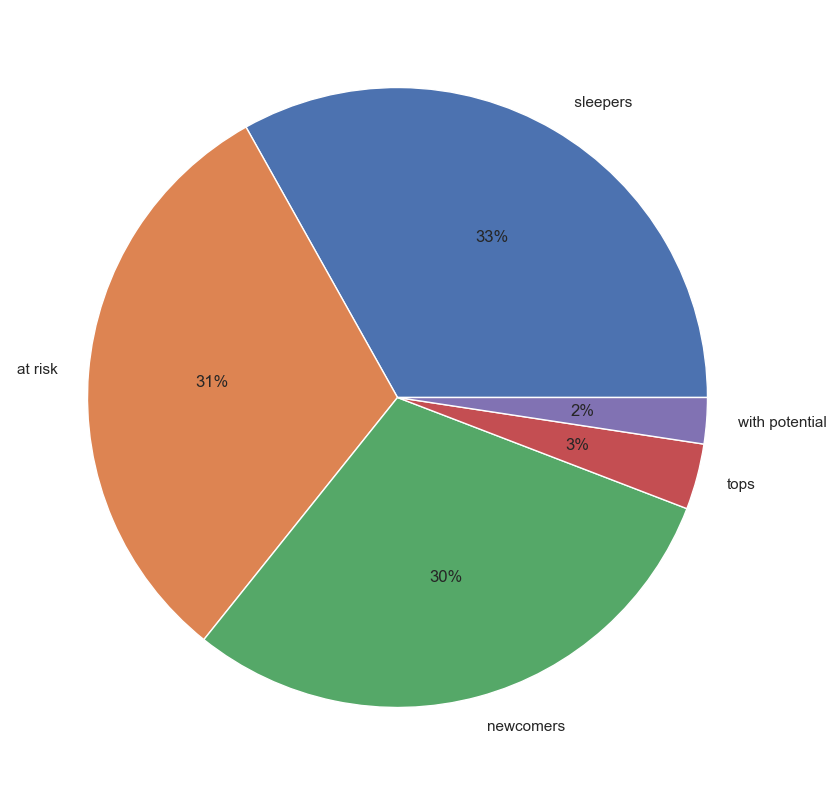

In [53]:
plt.pie(rfm_count_by_class.clients_per_class, labels=rfm_count_by_class.customer_class, autopct='%.0f%%')
sns.set(rc={'figure.figsize':(10,15)})

<h4>First of all lets keep in mind that we are now looking at 2913 clients that have 2 or more purchases of total 95997 clients that have made purchase.</h4> <br>
    
It is possible to split that group of 2913 customers to different classes (categories). <br>
Categories are based on number of purchases, total spendings and client's date of the last purchase. <br><br>
Boiling it down - we have three almost equal groups:
<ol>
<li>Sleepers - clients that mad last purchase more than 356 day ago;</li>
<li>At risk - clients with lowest frequency rank of purchasing and last purchase between 356 and 169 days;</li>
<li>Newcomers - new clients, that made no more than 2 purchases in less than 169 last days;</li>
</ol>
There is also group with great potntial (2%) and group of our best customers (3%).<br>
    
To conclude:<br> it is seems that groups 'newcomers' and 'at risk' could be good sourse to expand 'with potential' and 'top' groups.<br> At the same time there are 93084 clients that have made only one purchase and not covered by RFM chart or retention rate map. Increasing their frequency of purchasing also could be great source of income.